## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

## Read Data

In [51]:
df = pd.read_csv("/content/insurance.csv")

# EDA

In [18]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df.shape

(1338, 7)

In [20]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [21]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA

In [22]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Find the Categorical Column(s)

In [8]:
categorical_columns = df.select_dtypes(include = ['object']).columns
categorical_columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [52]:
label_encoder = preprocessing.LabelEncoder()

df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']= label_encoder.fit_transform(df['smoker'])

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [24]:
# Correlation
corr_matrix = df.corr()
corr_matrix
# sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
# plt.title("Correlation Between Features")
# plt.show()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### Distribution plot of bmi column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


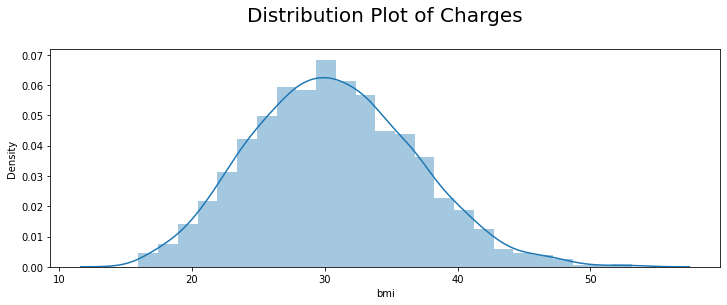

In [25]:
plt.figure(figsize = (12, 4))
sns.distplot(df['bmi'])
plt.title('Distribution Plot of Charges\n', fontsize =  20)
plt.show()

In [ ]:
# There is no skewness about the bmi feature.

[#### The relationship between “smoker” and “charges”

In [26]:
df1 = df.groupby(['smoker'])['charges'].count().to_frame().reset_index()
df1

,smoker,charges
0,no,1064
1,yes,274


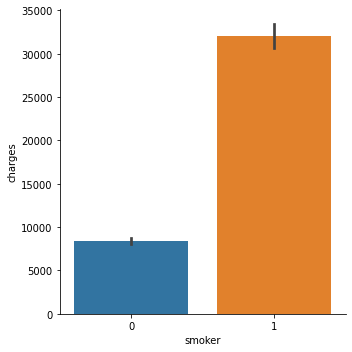

In [13]:
sns.catplot(x="smoker", y="charges",
                data=df, kind="bar");

####The relationship between “smoker” and “region” 

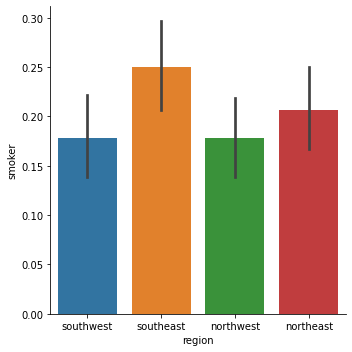

In [14]:
sns.catplot(x="region", y="smoker", data=df, kind="bar")

#### The relationship between “bmi” and “sex”

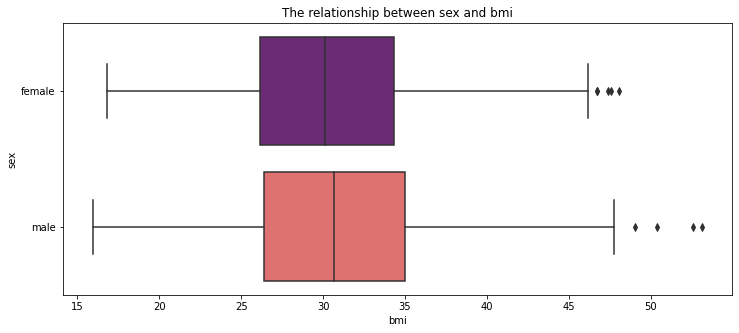

In [41]:
plt.figure(figsize=(12,5))
plt.title("The relationship between sex and bmi")
sns.boxplot(y="sex", x="bmi", data = df, orient="h", palette = 'magma')

In [ ]:
# BMI values ​​for male are slightly higher than for female

#### The relationship between “bmi” and “children”

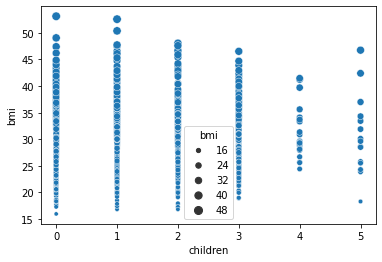

In [42]:
sns.scatterplot(x="children",y="bmi",data=df, size='bmi') # Buna tekrar bakılacak !!!

#### Is there an outlier in the "bmi" variable?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



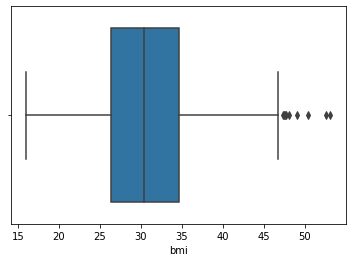

In [43]:
sns.boxplot(df['bmi'])

In [44]:
# In the above graph, can clearly see that values above 45 are acting as the outliers.

#### The relationship between “bmi” and “charges”

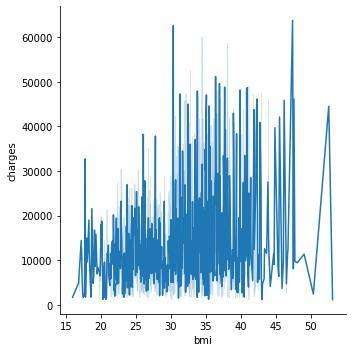

In [45]:
sns.relplot(data=df, x='bmi', y='charges', kind='line')

#### The relationship between “region”, “smoker” and “bmi”

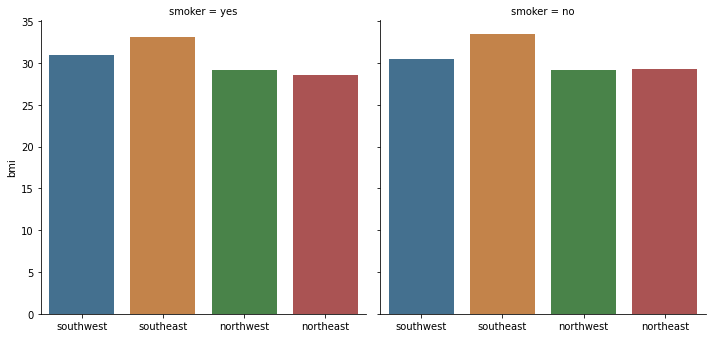

In [46]:
g = sns.catplot(x="region", y="bmi", col="smoker",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1)
(g.set_axis_labels("", "bmi")
  .set_xticklabels(['southwest', 'southeast', 'northwest', 'northeast']))



# Data Preprocessing

In [53]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()

# df['sex']= label_encoder.fit_transform(df['sex']) # Label encoder for 'sex'

# df['smoker']= label_encoder.fit_transform(df['smoker']) # Label encoder for 'smoker'

df= pd.get_dummies(df, columns = ["region"])

df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


### Outlier Detection & Drop

In [54]:
X = df.drop("charges", axis= 1)
y = df["charges"]

columns = X.columns.tolist()

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(X)
X_score = clf.negative_outlier_factor_

outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

#threshold
threshold = -1.5
filter = outlier_score["score"] < threshold
outlier_index = outlier_score[filter].index.tolist()
outlier_index
#drop outliers
X = X.drop(outlier_index)
y = y.drop(outlier_index).values

### Normalization

In [55]:
from sklearn import preprocessing

normalized = preprocessing.normalize(df, axis = 0)
normalized_df = pd.DataFrame(normalized, columns = df.columns)
normalized_df


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.012472,0.000000,0.024397,0.000000,0.060412,0.025698,0.000000,0.00000,0.000000,0.05547
1,0.011816,0.038462,0.029530,0.016791,0.000000,0.002626,0.000000,0.00000,0.052414,0.00000
2,0.018380,0.038462,0.028857,0.050372,0.000000,0.006772,0.000000,0.00000,0.052414,0.00000
3,0.021662,0.038462,0.019854,0.000000,0.000000,0.033460,0.000000,0.05547,0.000000,0.00000
4,0.021006,0.038462,0.025254,0.000000,0.000000,0.005885,0.000000,0.05547,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...
1333,0.032822,0.038462,0.027082,0.050372,0.000000,0.016134,0.000000,0.05547,0.000000,0.00000
1334,0.011816,0.000000,0.027912,0.000000,0.000000,0.003357,0.055556,0.00000,0.000000,0.00000
1335,0.011816,0.000000,0.032223,0.000000,0.000000,0.002481,0.000000,0.00000,0.052414,0.00000
1336,0.013785,0.000000,0.022561,0.000000,0.000000,0.003056,0.000000,0.00000,0.000000,0.05547


#### Train-Test Split

In [56]:
X = normalized_df.drop(['charges'], axis=1)
y = normalized_df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle = "True")
print(X_train.shape)
print(X_test.shape)

(1070, 9)
(268, 9)


# Random Forest Regression


In [57]:
rfr = RandomForestRegressor (random_state = 42)

In [58]:
param_grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'random_state': [18]
    }

In [59]:
from sklearn.model_selection import GridSearchCV
CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [60]:
CV_rfr.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'random_state': 18}

In [61]:
rfr1 = RandomForestRegressor(random_state = 18, max_features = 'sqrt', n_estimators = 200, max_depth = 8)

In [62]:
rfr1.fit(X_train, y_train)
pred=rfr1.predict(X_test)

In [65]:
 print("R2 score :--->>",r2_score(y_test, pred))

R2 score :--->> 0.891799418314625


# Polynomial Regression

In [68]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

plr = LinearRegression().fit(X_train,y_train)

Y_train_pred = plr.predict(X_train)
pred = plr.predict(X_test)

print("R2 score :--->>",r2_score(y_test, pred))

R2 score :--->> 0.8000465445902472


### Two different Regression models were tried. In addition, R^2 score was taken as the evaluation metric. According to R^2 scores, Random Forest Regressor gave the best results. In addition, the success rate was increased by R^2 by optimizing the parameters in Random Forest Regressor.